In [ ]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!pip install pycocotools

  Obtaining dependency information for pycocotools from https://files.pythonhosted.org/packages/ba/64/0451cf41a00fd5ac4501de4ea0e395b7d909e09d665e56890b5d3809ae26/pycocotools-2.0.7-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.2/426.2 kB 7.4 MB/s eta 0:00:00a 0:00:01


### How to delete folder in Kaggle Notebook

In [ ]:
# import shutil
# shutil.rmtree("/kaggle/working/person_images")

# Inspect Data

loading annotations into memory...
Done (t=26.34s)
creating index...
index created!


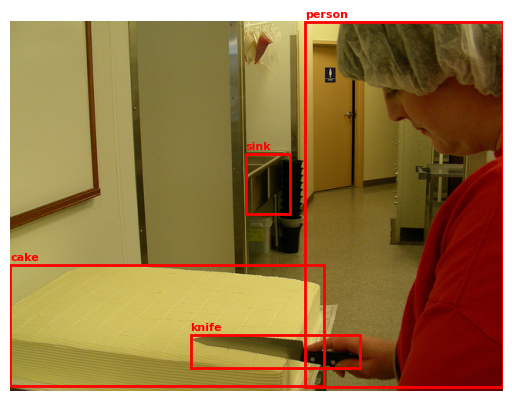

In [ ]:
from pycocotools.coco import COCO
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os

# Define the paths to annotations and images
annotations_path = "/kaggle/input/coco-2017-dataset/coco2017/annotations/instances_train2017.json"
images_dir = "/kaggle/input/coco-2017-dataset/coco2017/train2017"

# Initialize COCO API for instance annotations
coco = COCO(annotations_path)

# Load category names
cat_ids = coco.getCatIds()
cats = coco.loadCats(cat_ids)
cat_names = [cat["name"] for cat in cats]

# Choose a different image index (e.g., the second image)
image_index = 1

# Load information for the selected image
image_id = coco.getImgIds()[image_index]
image_info = coco.loadImgs(image_id)[0]
image_path = os.path.join(images_dir, image_info["file_name"])
image = Image.open(image_path)

# Get annotations for the image
ann_ids = coco.getAnnIds(imgIds=image_info["id"], catIds=cat_ids, iscrowd=None)
annotations = coco.loadAnns(ann_ids)

# Visualize the image with annotations and labels
plt.imshow(image)
plt.axis("off")

# Plot annotations (bounding boxes) with class labels
for ann in annotations:
    bbox = ann["bbox"]
    class_id = ann["category_id"]
    class_name = coco.loadCats(class_id)[0]["name"]

    rect = patches.Rectangle(
        (bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=2, edgecolor="r", facecolor="none"
    )
    plt.gca().add_patch(rect)

    plt.text(bbox[0], bbox[1] - 5, class_name, color="r", fontsize=8, weight="bold")

plt.show()


# Split Training and Validation

In [ ]:
from pycocotools.coco import COCO
import os
import shutil
import numpy as np

# Define the paths to annotations and images for training and validation
train_annotations_path = "/kaggle/input/coco-2017-dataset/coco2017/annotations/instances_train2017.json"
val_annotations_path = "/kaggle/input/coco-2017-dataset/coco2017/annotations/instances_val2017.json"
train_images_dir = "/kaggle/input/coco-2017-dataset/coco2017/train2017"
val_images_dir = "/kaggle/input/coco-2017-dataset/coco2017/val2017"
output_dir = "/kaggle/working/person_images"

# Create COCO API instances for training and validation annotations
coco_train = COCO(train_annotations_path)
coco_val = COCO(val_annotations_path)

# Get category ID for "person"
person_category_id = coco_train.getCatIds(catNms=['person'])[0]

# Initialize output directories
os.makedirs(output_dir, exist_ok=True)
train_output_dir = os.path.join(output_dir, "train")
val_output_dir = os.path.join(output_dir, "validation")
os.makedirs(train_output_dir, exist_ok=True)
os.makedirs(val_output_dir, exist_ok=True)

# Initialize counters
train_count = 0
val_count = 0

# Process training images
for image_id in coco_train.getImgIds(): # iterates through each image in the training set
    image_info = coco_train.loadImgs(image_id)[0]
    annotations = coco_train.loadAnns(coco_train.getAnnIds(imgIds=image_id, catIds=[person_category_id]))

    if len(annotations) > 0:
        image_path = os.path.join(train_images_dir, image_info["file_name"])

        # Decide whether to put the image in the training or validation set
        output_subdir = train_output_dir if np.random.rand() < 0.8 else val_output_dir

        # Copy the image to the appropriate directory
        shutil.copy(image_path, output_subdir)

        # Increment the count
        if output_subdir == train_output_dir:
            train_count += 1
        else:
            val_count += 1

# Process validation images
for image_id in coco_val.getImgIds():
    image_info = coco_val.loadImgs(image_id)[0]
    annotations = coco_val.loadAnns(coco_val.getAnnIds(imgIds=image_id, catIds=[person_category_id]))

    if len(annotations) > 0:
        image_path = os.path.join(val_images_dir, image_info["file_name"])

        # Decide whether to put the image in the training or validation set
        output_subdir = train_output_dir if np.random.rand() < 0.8 else val_output_dir

        # Copy the image to the appropriate directory
        shutil.copy(image_path, output_subdir)

        # Increment the count
        if output_subdir == train_output_dir:
            train_count += 1
        else:
            val_count += 1

# Display the number of images for training and validation
print(f"Number of images for training: {train_count}")
print(f"Number of images for validation: {val_count}")


loading annotations into memory...
Done (t=21.63s)
creating index...
index created!
loading annotations into memory...
Done (t=0.89s)
creating index...
index created!
Number of images for training: 53378
Number of images for validation: 13430


## Check 5 sample in Training and Validation

Sample Training Images:


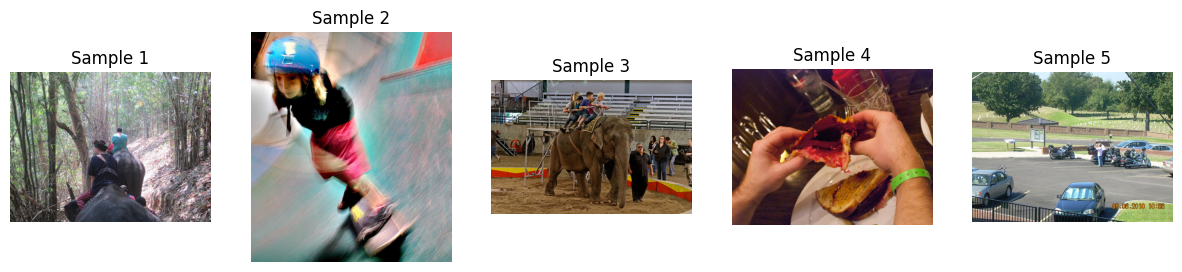

Sample Validation Images:


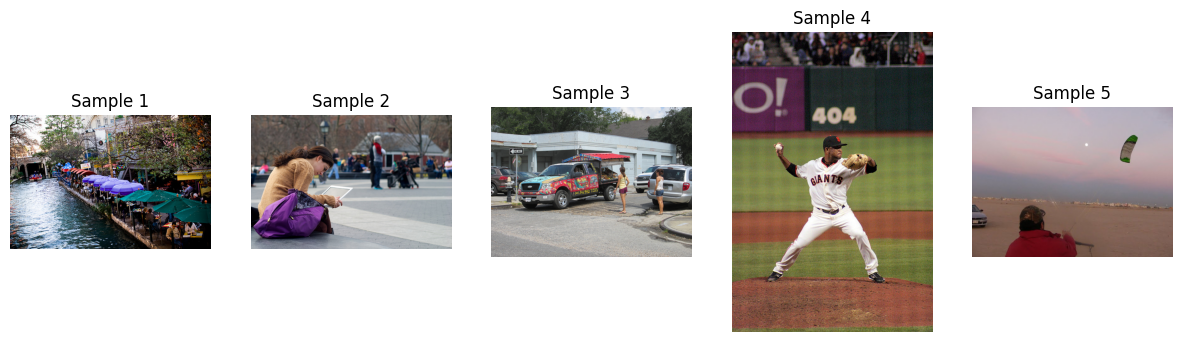

In [ ]:
import matplotlib.pyplot as plt
import random
from PIL import Image
import os

# Function to display sample images from a directory
def display_sample_images(directory, num_samples=5):
    image_files = random.sample(os.listdir(directory), num_samples)
    plt.figure(figsize=(15, 6))

    for i, image_file in enumerate(image_files):
        image_path = os.path.join(directory, image_file)
        image = Image.open(image_path)

        plt.subplot(1, num_samples, i+1)
        plt.imshow(image)
        plt.axis('off')
        plt.title(f'Sample {i+1}')

    plt.show()

# Display 5 sample training images
print("Sample Training Images:")
display_sample_images("/kaggle/working/person_images/train")

# Display 5 sample validation images
print("Sample Validation Images:")
display_sample_images("/kaggle/working/person_images/validation")

# Training Phase

In [ ]:
# import os
# # Check apakah ada gambar di directory
# os.listdir("/kaggle/working/person_images/validation")

Let's try a different approach to load the images using a custom data generator. We'll use tf.data.Dataset to manually load and preprocess the images. This can be helpful in cases where the directory structure doesn't align perfectly with the assumptions of flow_from_directory

In [ ]:
!pip install keras_resnet

# Clone keras-retinanet repository
!git clone https://github.com/fizyr/keras-retinanet.git

# Change to keras-retinanet directory
%cd keras-retinanet

# Install the package
!pip install .


  Preparing metadata (setup.py) ... done
  Created wheel for keras_resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20457 sha256=6af325d5cdc26ef1eb19d91b6692fa368726bee7db26d9c64850b27d9bbd18f6
  Stored in directory: /root/.cache/pip/wheels/16/af/88/a668b279c5eadbe55dcaf6207f09059135166cefb09088bacc
Successfully built keras_resnet
Cloning into 'keras-retinanet'...
remote: Enumerating objects: 6224, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 6224 (delta 6), reused 9 (delta 2), pack-reused 6205
Receiving objects: 100% (6224/6224), 13.48 MiB | 18.02 MiB/s, done.
Resolving deltas: 100% (4207/4207), done.
/kaggle/working/keras-retinanet
Processing /kaggle/working/keras-retinanet
  Preparing metadata (setup.py) ... done
  Created wheel for keras-retinanet: filename=keras_retinanet-1.0.0-cp310-cp310-linux_x86_64.whl size=133079 sha256=c763724e716d46468a3542f097c0c530091adcfadaa9707a0970c115391185e7
  Stored i

In [ ]:
import tensorflow as tf
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers
from tensorflow.keras.models import Model

In [ ]:
# Set your paths
train_output_dir = "/kaggle/working/person_images/train"
val_output_dir = "/kaggle/working/person_images/validation"

# Set the number of samples to load
num_train_samples = 5000
num_val_samples = 1000

# Set training parameters
batch_size = 32
learning_rate = 0.001

In [ ]:
# Function to create a tf.data.Dataset from image files with a specified number of samples
def create_dataset(directory, num_samples, batch_size):
    image_paths = [os.path.join(directory, filename) for filename in os.listdir(directory)[:num_samples]]
    labels = [0] * len(image_paths)  # Assuming binary classification with a single class (person)

    dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels))
    dataset = dataset.map(parse_function, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    dataset = dataset.shuffle(buffer_size=len(image_paths))
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

    return dataset

# Function to parse image files
def parse_function(filename, label):
    image_string = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(image_string, channels=3)
    image = tf.image.resize(image, (224, 224))
    image = tf.keras.applications.resnet50.preprocess_input(image)
    return image, label

In [ ]:
# Create training and validation datasets with a specified number of samples
train_dataset = create_dataset(train_output_dir, num_train_samples, batch_size)
val_dataset = create_dataset(val_output_dir, num_val_samples, batch_size)

# Load pre-trained ResNet50 model without top (fully connected) layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(None, None, 3))

# Add Faster R-CNN head
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
predictions = layers.Dense(1, activation='sigmoid')(x)

In [ ]:
# Create the Faster R-CNN model
faster_rcnn_model = Model(inputs=base_model.input, outputs=predictions)

# Compile the Faster R-CNN model with mAP and IOU metrics
faster_rcnn_model.compile(
    optimizer=Adam(learning_rate),
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc'),  # Area under the ROC curve
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.MeanIoU(num_classes=2, name='mean_iou'),
    ]
)

# Train the Faster R-CNN model
history = faster_rcnn_model.fit(
    train_dataset,
    epochs=20,  # Adjust the number of epochs as needed
    validation_data=val_dataset
)

Epoch 1/20
157/157 [==============================] - 84s 209ms/step - loss: 0.0054 - accuracy: 0.9958 - auc: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - mean_iou: 1.0000 - val_loss: 1.8774e-15 - val_accuracy: 1.0000 - val_auc: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_mean_iou: 1.0000
Epoch 2/20
157/157 [==============================] - 42s 196ms/step - loss: 1.0321e-08 - accuracy: 1.0000 - auc: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - mean_iou: 1.0000 - val_loss: 1.1325e-09 - val_accuracy: 1.0000 - val_auc: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_mean_iou: 1.0000
Epoch 3/20
157/157 [==============================] - 42s 196ms/step - loss: 7.3977e-09 - accuracy: 1.0000 - auc: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - mean_iou: 1.0000 - val_loss: 4.9154e-09 - val_accuracy: 1.0000 - val_auc: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_mean_iou: 1.0000
Epoch

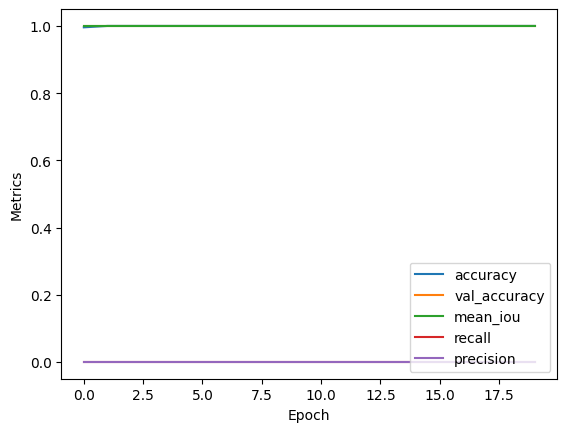

In [ ]:
# Display training history with iou
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['mean_iou'], label='mean_iou')
plt.plot(history.history['recall'], label='recall')
plt.plot(history.history['precision'], label='precision')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.legend(loc='lower right')
plt.show()

# Save the trained model
faster_rcnn_model.save("/kaggle/working/faster_rcnn_model.h5")

# Testing

In [ ]:
# Test the model on a sample image
sample_image_path = "/kaggle/input/coco-2017-dataset/coco2017/test2017/000000000063.jpg"  # Replace with the path to your test image
sample_image = cv2.imread(sample_image_path)
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

# Preprocess the sample image for prediction
sample_image = tf.keras.applications.resnet50.preprocess_input(sample_image)
sample_image = np.expand_dims(sample_image, axis=0)

# Make predictions on the sample image
predictions = faster_rcnn_model.predict(sample_image)
print(predictions)

1/1 [==============================] - 1s 1s/step
[[6.4548424e-14]]


In [ ]:
import cv2
import numpy as np

def visualize_results(image, boxes, labels, scores):
    image_with_boxes = image.copy()

    for box, label, score in zip(boxes, labels, scores):
        # Convert normalized coordinates to pixel values
        h, w, _ = image.shape
        box_pixels = [int(b * (w if i % 2 == 0 else h)) for i, b in enumerate(box)]

        # Draw bounding box
        color = (0, 255, 0)  # Green color
        thickness = 2
        image_with_boxes = cv2.rectangle(image_with_boxes, (box_pixels[0], box_pixels[1]),
                                         (box_pixels[2], box_pixels[3]), color, thickness)

        # Display label and confidence score
        label_text = f"Label: {label}, Score: {score:.2f}"
        cv2.putText(image_with_boxes, label_text, (box_pixels[0], box_pixels[1] - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, thickness)

    # Display the image with bounding boxes
    plt.imshow(image_with_boxes)
    plt.show()


1/1 [==============================] - 1s 939ms/step


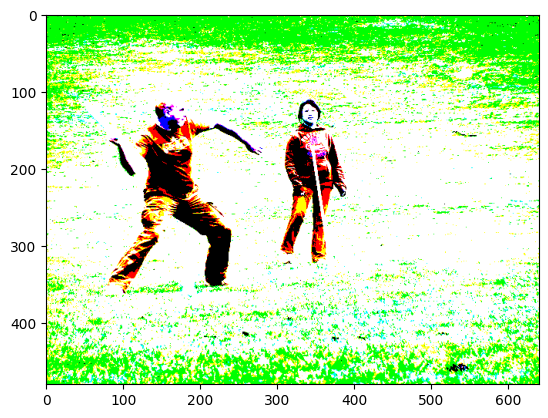

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Assuming the visualization code and the `visualize_results` function are defined

# Load the Faster R-CNN model
faster_rcnn_model = tf.keras.models.load_model("/kaggle/working/faster_rcnn_model.h5")

# Test the model on a sample image
sample_image_path = "/kaggle/input/coco-2017-dataset/coco2017/test2017/000000000063.jpg"
sample_image = cv2.imread(sample_image_path)
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

# Preprocess the sample image for prediction
sample_image = tf.keras.applications.resnet50.preprocess_input(sample_image)
sample_image = np.expand_dims(sample_image, axis=0)

# Make predictions on the sample image
predictions = faster_rcnn_model.predict(sample_image)

# Filter predictions based on confidence threshold
confidence_threshold = 0.5
selected_boxes = post_process_predictions(predictions, confidence_threshold)

# Assuming `selected_boxes` is a list of dictionaries, each containing bounding box coordinates, class label, and confidence
boxes = np.array([box['box'] for box in selected_boxes])
labels = np.array([box['label'] for box in selected_boxes])
confidences = np.array([box['confidence'] for box in selected_boxes])

# Visualize the results
visualize_results(sample_image[0], boxes, labels, confidences)